In [3]:
#Importamos librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
!head data_nps.csv

"head" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [5]:
#Cargamos el dataframe y nos interiorizamos de sus campos
#Que no haya una columna que se llame 'Unnamed: 0'
df  = pd.read_csv('data_nps.csv')

In [6]:
df

,Unnamed: 0,CREATION_DATE,RESPONSE_DATE,CURRENT_STATUS,GENDER,DAY_OF_BIRTH,CIF_ID,AGE,LOCATION,TOUCHPOINT_NUMBER,CASE_NUMBER,CASE_DATE,CASE_CHANNEL,PRODUCT_NAME,NPS_SCORE,TAGS
0,0,2021-06-11 10:30:03 UTC,2021-06-12 10:43:18 UTC,2,M,1954-09-18 00:00:00 UTC,1402267,66.0,DOMINGO FAUSTINO SARMIENTO,Service,5671770,2021-06-09 00:00:00 UTC,EUROP,Automotores Individuales,0,mot Grua mot Servicio mot Accesibilidad mo...
1,1,2021-06-10 10:30:03 UTC,2021-06-12 17:38:35 UTC,5,F,1994-10-06 00:00:00 UTC,23733377,26.0,CORDOBA,Service,5662123,2021-06-08 00:00:00 UTC,AUXICAJA,Automotores Individuales,9,mot Servicio mot Precio atr Eficacia mot A...
2,2,2021-06-07 10:30:03 UTC,2021-06-12 16:52:27 UTC,5,M,1980-08-07 00:00:00 UTC,21113765,40.0,DIAMANTE,Service,5625253,2021-06-03 00:00:00 UTC,AUXICAJA,Automotores Individuales,10,NaN
3,3,2021-06-10 10:30:03 UTC,2021-06-13 19:29:41 UTC,5,M,1959-09-12 00:00:00 UTC,19579674,61.0,CIUDAD AUTONOMA BUENOS AIRES,Query/Servicing request,5663499,2021-06-09 00:00:00 UTC,SUCURSAL,Automotores Individuales,10,mot Grua atr Eficacia
4,4,2021-05-31 10:30:03 UTC,2021-06-06 22:26:27 UTC,1,M,1952-04-19 00:00:00 UTC,13972088,69.0,TRANCAS,Claims,5582911,2021-05-21 00:00:00 UTC,CALL CENTER,Automotores Individuales,0,mot Siniestro atr Eficacia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,15995,2021-05-10 10:30:03 UTC,2021-05-10 10:46:11 UTC,5,M,1974-11-24 00:00:00 UTC,23609326,46.0,ISIDRO CASANOVA,Documentation Request,5436373,2021-05-07 00:00:00 UTC,WEB,Automotores Individuales,9,mot Siniestro mot Cobertura poliza
15996,15996,2021-05-10 10:30:03 UTC,2021-05-10 12:12:26 UTC,0,M,1960-09-21 00:00:00 UTC,11254684,60.0,CIUDAD AUTONOMA BUENOS AIRES,Documentation Request,5434652,2021-05-07 00:00:00 UTC,WEB,Automotores Individuales,7,mot Siniestro mot FacturacionPagos mot Prec...
15997,15997,2021-05-10 10:30:03 UTC,2021-05-10 19:38:46 UTC,0,M,1960-07-15 00:00:00 UTC,16971297,60.0,SAN MIGUEL DE TUCUMAN,Documentation Request,5435120,2021-05-07 00:00:00 UTC,WEB,Automotores Individuales,7,NaN
15998,15998,2021-05-10 10:30:03 UTC,2021-05-10 10:45:03 UTC,2,M,1956-07-10 00:00:00 UTC,5768360,64.0,VILLA DOMINICO,Documentation Request,5434365,2021-05-07 00:00:00 UTC,WEB,Automotores Individuales,2,mot Siniestro atr Conformidad mot Facturaci...


In [7]:
#mostrar nombres de columna
df.columns

Index(['Unnamed: 0', 'CREATION_DATE', 'RESPONSE_DATE', 'CURRENT_STATUS',
       'GENDER', 'DAY_OF_BIRTH', 'CIF_ID', 'AGE', 'LOCATION',
       'TOUCHPOINT_NUMBER', 'CASE_NUMBER', 'CASE_DATE', 'CASE_CHANNEL',
       'PRODUCT_NAME', 'NPS_SCORE', 'TAGS'],
      dtype='object')

Hacer una función que determine si es promotor, detractor y neutro e implementarla a una columna del dataset que se llama nps_segment
* Promotor: NPS_SCORE = 8,9,10
* Neutro: NPS_SCORE = 6,7
* Detractor: NPS_SCORE = 1,2,3,4,5

In [8]:
def nps_segment(x):
    if x <=5:
        return 'detractor'
    elif 6 <= x <= 7:
        return 'neutro'
    else:
        return 'promotor'

df["nps_segment"] = df["NPS_SCORE"].apply(nps_segment)


In [48]:
lst = [df]
for column in lst:
    column.loc[column["NPS_SCORE"] <= 6,  'nps_segment'] = "detractor"
    column.loc[(column["NPS_SCORE"] >= 7) & (column["NPS_SCORE"] <= 8), 'nps_segment'] = "neutro"
    column.loc[(column["NPS_SCORE"] >= 9), 'nps_segment'] = "promotor"


Con numpy.where crear una columna llamada detected, que determina si la columna TAGS tiene algun contenido. Poner True si lo tiene y si no tiene contenido poner False.

In [10]:
df["detected"]= np.where(df["TAGS"].notnull(),True,False)

## Dates
Devolver la fecha máxima y minima de la columna CREATION_DATE

In [11]:
df.CREATION_DATE.max()

'2021-06-15 12:35:01 UTC'

In [12]:
df.CREATION_DATE.min()

'2020-12-10 10:30:03 UTC'

Chequear el tipo de dato de la columna

In [13]:
df.CREATION_DATE

0        2021-06-11 10:30:03 UTC
1        2021-06-10 10:30:03 UTC
2        2021-06-07 10:30:03 UTC
3        2021-06-10 10:30:03 UTC
4        2021-05-31 10:30:03 UTC
                  ...           
15995    2021-05-10 10:30:03 UTC
15996    2021-05-10 10:30:03 UTC
15997    2021-05-10 10:30:03 UTC
15998    2021-05-10 10:30:03 UTC
15999    2021-05-10 10:39:05 UTC
Name: CREATION_DATE, Length: 16000, dtype: object

Crear una columna que solo tenga año y mes. Llameémosle year_month. Utilizar pd.to_datetime()

In [14]:
df["CREATION_DATE"] = pd.to_datetime(df["CREATION_DATE"])

In [15]:
df["year_month"] = df["CREATION_DATE"].dt.to_period('m')

C:\Users\Nicolas\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [16]:
df["year_month"]

0        2021-06
1        2021-06
2        2021-06
3        2021-06
4        2021-05
          ...   
15995    2021-05
15996    2021-05
15997    2021-05
15998    2021-05
15999    2021-05
Name: year_month, Length: 16000, dtype: period[M]

## Conteo.
Crear un nuevo dataframe agrupado por year_month donde tenga la cantidad de encuestas únicas mes a mes
** Hint**:
```python
df.groupby(grouping_column).agg("count")
```

In [17]:
df.groupby("year_month").agg("count")

,Unnamed: 0,CREATION_DATE,RESPONSE_DATE,CURRENT_STATUS,GENDER,DAY_OF_BIRTH,CIF_ID,AGE,LOCATION,TOUCHPOINT_NUMBER,CASE_NUMBER,CASE_DATE,CASE_CHANNEL,PRODUCT_NAME,NPS_SCORE,TAGS,nps_segment,detected
year_month,,,,,,,,,,,,,,,,,,
2020-12,124,124,124,124,123,123,124,123,124,124,124,124,124,124,124,111,124,124
2021-01,2617,2617,2617,2617,2612,2612,2617,2612,2610,2617,2617,2617,2617,2617,2617,2246,2617,2617
2021-02,2433,2433,2433,2433,2427,2426,2433,2426,2428,2433,2433,2433,2433,2433,2433,2139,2433,2433
2021-03,3308,3308,3308,3308,3294,3294,3308,3294,3297,3308,3308,3308,3308,3308,3308,2866,3308,3308
2021-04,2883,2883,2883,2883,2868,2868,2883,2868,2876,2883,2883,2883,2883,2883,2883,2466,2883,2883
2021-05,3066,3066,3066,3066,3051,3051,3066,3051,3055,3066,3066,3066,3066,3066,3066,2632,3066,3066
2021-06,1569,1569,1569,1569,1562,1562,1569,1562,1568,1569,1569,1569,1569,1569,1569,1356,1569,1569


Crear un dataste donde sume la cantidad de encuestas con TAG detectados, mes a mes

**Hint** :
```python
df.groupby(grouping_column).agg(
    new_col_name =  ('old_col_name', 'sum'),
    new_col_name_2 = ('old_col_name', 'mean')
)
```

In [53]:
df.groupby("year_month").agg(
    cantidad_detectadas =  ('detected', 'sum'))

,cantidad_detectadas
year_month,
2020-12,111
2021-01,2246
2021-02,2139
2021-03,2866
2021-04,2466
2021-05,2632
2021-06,1356


Crear otro dataset donde tenga la cantidad de encuestas por nps_segment unicas por mes. promotoras, neutras y detractoras.

In [20]:
df.groupby(['year_month','nps_segment']).agg(
    cantidad_detectadas =  ('CIF_ID', 'nunique'))

cantidad_detectadas
year_month nps_segment                     
2020-12    detractor                     16
           neutro                         8
           promotor                     100
2021-01    detractor                    408
           neutro                       180
           promotor                    2028
2021-02    detractor                    472
           neutro                       162
           promotor                    1799
2021-03    detractor                    553
           neutro                       261
           promotor                    2494
2021-04    detractor                    416
           neutro                       206
           promotor                    2260
2021-05    detractor                    430
           neutro                       212
           promotor                    2421
2021-06    detractor                    219
           neutro                       100
           promotor                    1249

### Barras
Crear un dataste_por_segemento con el total de encuestas de CIF_ID unico por nps_segment.
Hacer un gráfico de barras con el total de encuestas por nps_segment

In [21]:
dataset_por_segmento = df.groupby("nps_segment").agg("nunique")["CIF_ID"]

In [22]:
dataset_por_segmento = dataset_por_segmento.reset_index()

In [23]:
dataset_por_segmento

,nps_segment,CIF_ID
0,detractor,2467
1,neutro,1117
2,promotor,11892


In [24]:
detract = len(df[df['nps_segment']=='detractor'])
promo = len(df[df['nps_segment']=='promotor'])
neutro = len(df[df['nps_segment']=='neutro'])

detract+promo+neutro

16000

In [25]:

from matplotlib import rcParams
rcParams['figure.figsize'] = 6,6
paleta = ["#66bd63", "#fee08b","#a50026"]

df['nps_segment'].value_counts()

promotor     12356
detractor     2515
neutro        1129
Name: nps_segment, dtype: int64

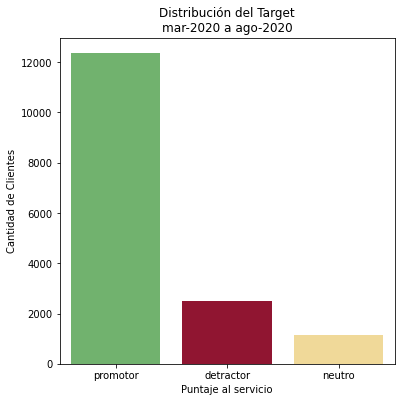

Porcentajes de Promotores de la muestra: 77.225
Porcentajes de Detractores de la muestra 15.71875
Porcentajes de Neutros de la muestra 7.05625


In [26]:
rcParams['figure.figsize'] = 6,6
paleta = ["#66bd63","#a50026", "#fee08b"]

df['nps_segment'].value_counts()
sns.countplot(x='nps_segment', data=df, palette=paleta, order = df['nps_segment'].value_counts().index)
plt.xlabel("Puntaje al servicio")
plt.ylabel("Cantidad de Clientes")
plt.title("Distribución del Target\nmar-2020 a ago-2020")
plt.show()



detract = len(df[df['nps_segment']=='detractor'])
promo = len(df[df['nps_segment']=='promotor'])
neutro = len(df[df['nps_segment']=='neutro'])

porciento_detractor =( detract/(detract+promo+neutro) * 100)
porciento_promotor= (promo /(detract+promo+neutro) * 100)
porciento_neutro= (neutro /(detract+promo+neutro) * 100)

print('Porcentajes de Promotores de la muestra:', porciento_promotor)
print('Porcentajes de Detractores de la muestra', porciento_detractor)
print('Porcentajes de Neutros de la muestra', porciento_neutro)

In [27]:
df["mes"] = pd.to_datetime(df.CASE_DATE).dt.month

In [28]:
per_month = pd.crosstab(df['nps_segment'],df['mes']).apply(lambda x: x/x.sum() * 100)
per_month = per_month.T
per_month

nps_segment,detractor,neutro,promotor
mes,,,
1,16.036415,6.932773,77.030812
2,19.586375,6.731549,73.682076
3,16.205402,8.002668,75.791931
4,14.415290,6.964691,78.620019
5,13.789778,7.007393,79.202829
6,14.742015,6.552007,78.705979
12,13.076923,4.615385,82.307692


<AxesSubplot:xlabel='mes'>

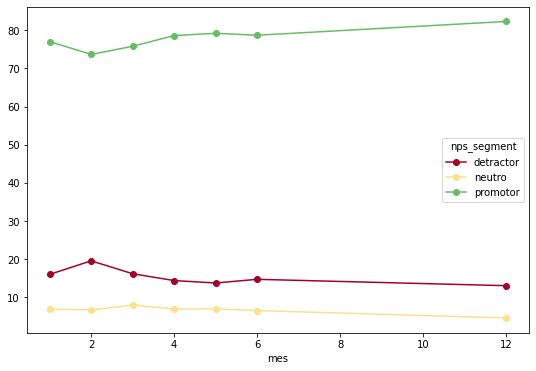

In [29]:
rcParams['figure.figsize'] = 9,6

per_month[['detractor','neutro',"promotor"]].plot( kind ='line', marker = "o",color = ("#a50026", "#fee08b","#66bd63"))

In [30]:

crooss_tab_mes = pd.crosstab(df['nps_segment'],df['mes'])
crooss_tab_mes.loc['Total',:]= crooss_tab_mes.sum(axis=0)
crooss_tab_mes = crooss_tab_mes.T

per_month["total"] = crooss_tab_mes["Total"]

<AxesSubplot:xlabel='mes'>

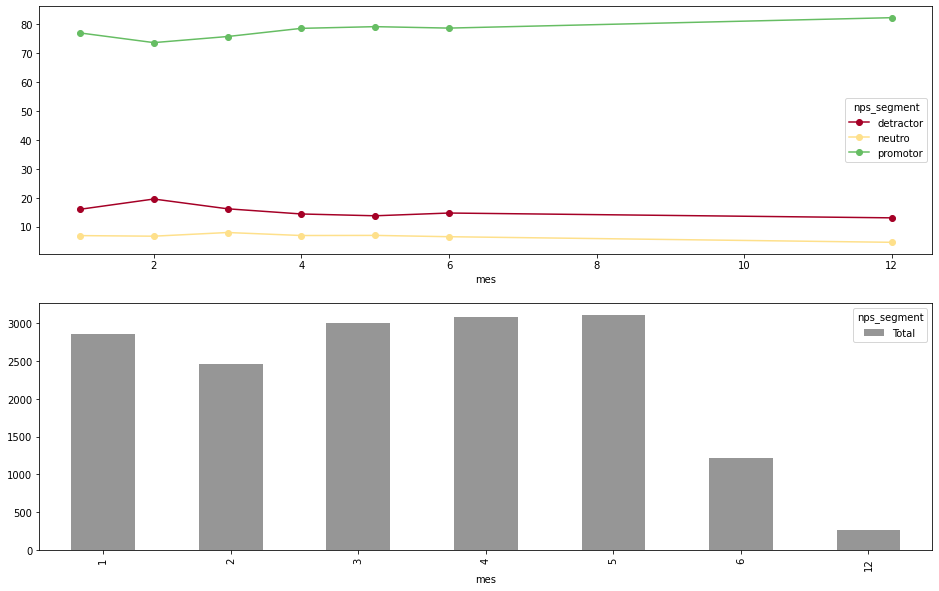

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16,10))
per_month[['detractor','neutro',"promotor"]].plot(ax=axes[0], kind ='line', marker = "o",color = ("#a50026", "#fee08b","#66bd63"))
crooss_tab_mes[['Total']].plot(ax=axes[1],kind ='bar',color = ("#969696"))

In [32]:
df.columns


Index(['Unnamed: 0', 'CREATION_DATE', 'RESPONSE_DATE', 'CURRENT_STATUS',
       'GENDER', 'DAY_OF_BIRTH', 'CIF_ID', 'AGE', 'LOCATION',
       'TOUCHPOINT_NUMBER', 'CASE_NUMBER', 'CASE_DATE', 'CASE_CHANNEL',
       'PRODUCT_NAME', 'NPS_SCORE', 'TAGS', 'nps_segment', 'detected',
       'year_month', 'mes'],
      dtype='object')

In [33]:
pd.crosstab(df['detected'],df['mes'])

mes,1,2,3,4,5,6,12
detected,,,,,,,
False,403,310,392,442,444,169,24
True,2453,2156,2607,2645,2667,1052,236


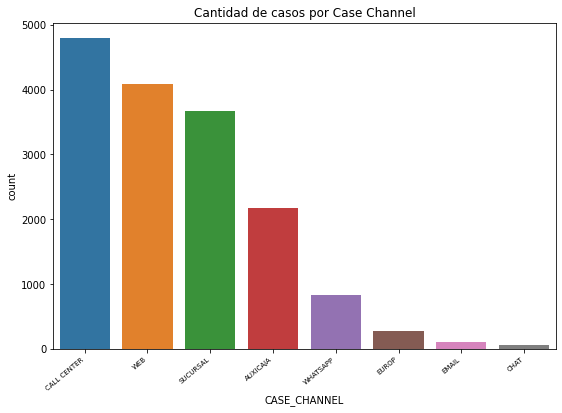

In [34]:
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=10)
ax = sns.countplot(data = df, x = 'CASE_CHANNEL',
              order = df['CASE_CHANNEL'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=7, rotation=40, ha="right")

ax.set_title('Cantidad de casos por Case Channel')
plt.show()

In [35]:
!pip install squarify

You should consider upgrading via the 'C:\Users\Nicolas\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [36]:
import squarify

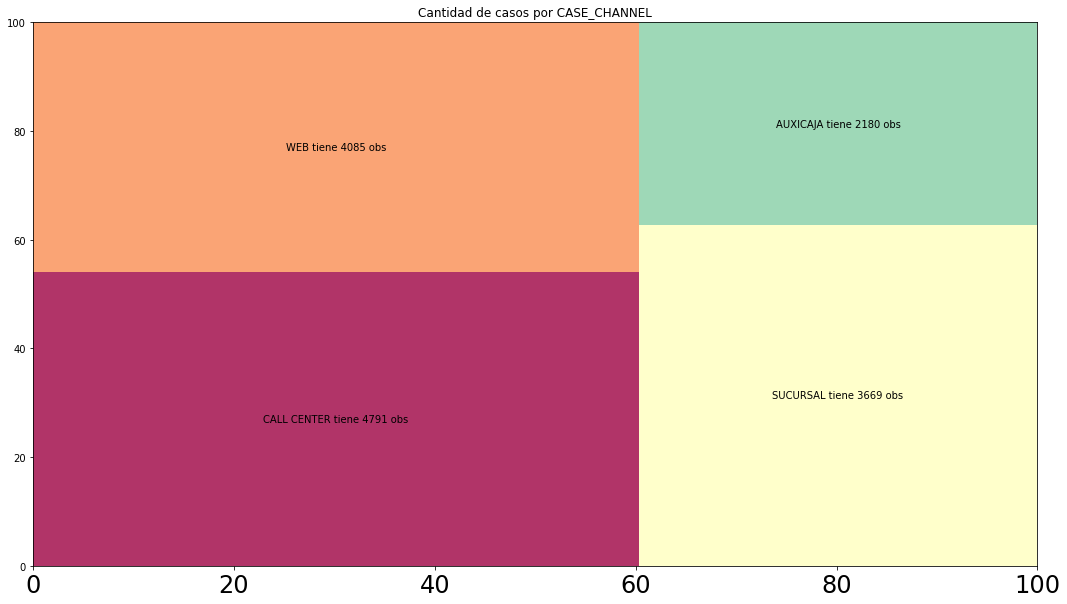

In [37]:
filtro = df[df['CASE_CHANNEL'].map(df['CASE_CHANNEL'].value_counts()) > 900]
label_value = filtro["CASE_CHANNEL"].value_counts().to_dict()
# Creo los labels usando a list comprehesion
labels = ["{} tiene {} obs".format(class_, obs) for class_, obs in label_value.items()]
# Creo colores por cantidad de trabajos
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]
plt.figure(figsize = (18, 10))
squarify.plot(sizes = label_value.values(), label = labels,  color = colors, alpha = 0.8)
plt.title("Cantidad de casos por CASE_CHANNEL");

In [38]:
unit_typesegment = pd.crosstab(filtro['nps_segment'],filtro['CASE_CHANNEL']).apply(lambda x: x/x.sum() * 100)
unit_typesegment = unit_typesegment.transpose()
unit_typesegment = unit_typesegment.reset_index(level=0, inplace=False)
unit_typesegment

nps_segment,CASE_CHANNEL,detractor,neutro,promotor
0,AUXICAJA,9.220183,4.770642,86.009174
1,CALL CENTER,12.126905,6.553955,81.319140
2,SUCURSAL,17.525211,7.795040,74.679749
3,WEB,17.747858,7.392901,74.859241


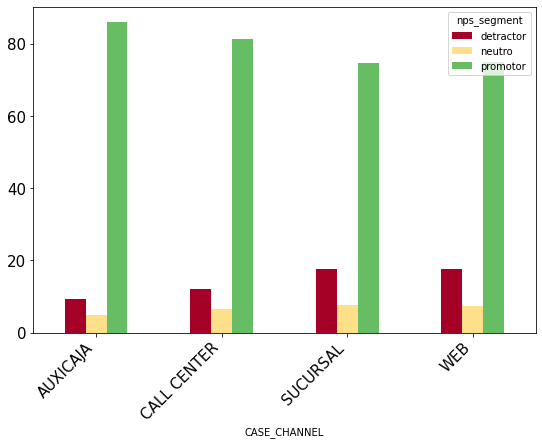

In [39]:
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
unit_typesegment.plot.bar(x="CASE_CHANNEL",color=["#a50026", '#fee08b', '#66bd63'])
plt.xticks(rotation=45, ha='right');

In [40]:
per_gender = pd.crosstab(df['nps_segment'],df['GENDER']).apply(lambda x: x/x.sum() * 100)
per_gender

GENDER,F,M
nps_segment,,
detractor,14.717477,16.220547
neutro,6.438896,7.342130
promotor,78.843627,76.437323


<AxesSubplot:xlabel='nps_segment'>

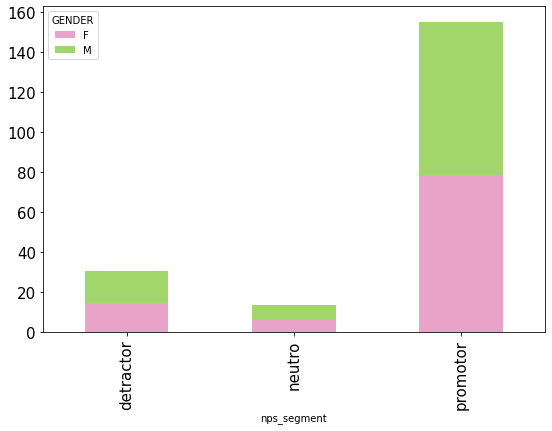

In [41]:
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
per_gender[['F','M']].plot(kind ='bar', stacked=True,color = ("#e9a3c9", "#a1d76a"))

In [42]:
print('Edad Max: ', df['AGE'].max())
print('Mediana de la edad: ', df['AGE'].median())
print('Promedio de la edad: ', df['AGE'].mean())
print('Edad Min: ', df['AGE'].min())

Edad Max:  121.0
Mediana de la edad:  51.0
Promedio de la edad:  51.15010040160642
Edad Min:  0.0


Text(0.5, 1.0, 'Distribución de la edad en la muestra')

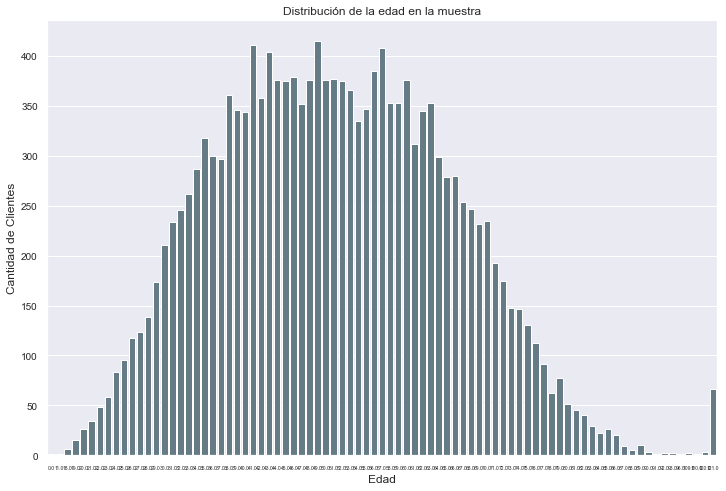

In [43]:
rcParams['figure.figsize'] = 12,8
sns.set()
plt.rc('xtick', labelsize=5)
plt.rc('ytick', labelsize=10)
sns.countplot(x = 'AGE', data = df,color = "#607d8b")
plt.xlabel("Edad")
plt.ylabel("Cantidad de Clientes")
plt.title("Distribución de la edad en la muestra")

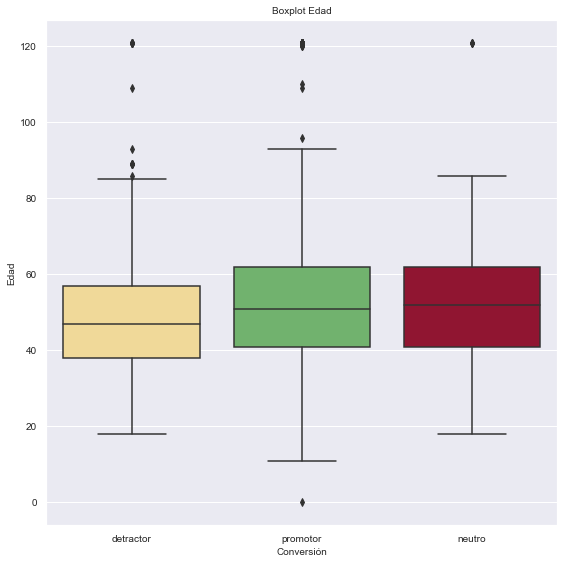

In [44]:
fig, (ax1) = plt.subplots( figsize = (8, 8))
sns.boxplot(y='AGE', x='nps_segment', data=df, palette=['#fee08b','#66bd63', '#a50026', ], ax = ax1)
ax1.set_xlabel('Conversión', fontsize=10)
ax1.set_ylabel('Edad', fontsize=10)
ax1.set_title('Boxplot Edad', fontsize=10)
ax1.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)

plt.tight_layout()

In [45]:

lst = [df]
for column in lst:
    column.loc[column["AGE"] < 30,  'grupo_edad'] = 20
    column.loc[(column["AGE"] >= 30) & (column["AGE"] <= 39), 'grupo_edad'] = 30
    column.loc[(column["AGE"] >= 40) & (column["AGE"] <= 49), 'grupo_edad'] = 40
    column.loc[(column["AGE"] >= 50) & (column["AGE"] <= 59), 'grupo_edad'] = 50
    column.loc[column["AGE"] >= 60, 'grupo_edad'] = 60

In [46]:
per_edad = pd.crosstab(df['nps_segment'],df['grupo_edad'])
per_edad = per_edad.T
per_edad

nps_segment,detractor,neutro,promotor
grupo_edad,,,
20.0,185,58,679
30.0,571,184,2107
40.0,662,254,2874
50.0,560,274,2841
60.0,526,352,3809


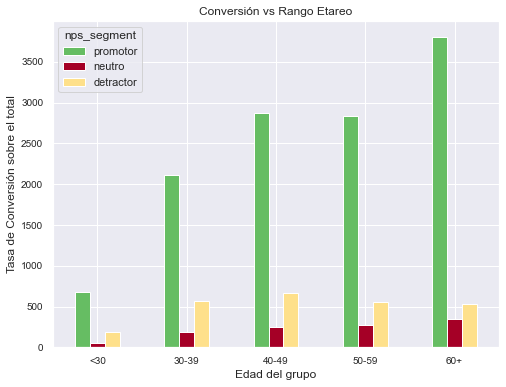

In [47]:
rcParams['figure.figsize'] = 8,6
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
sns.set_style("darkgrid")
plot_age = per_edad[["promotor","neutro", "detractor"]].plot(kind = 'bar',color = paleta)
plt.xlabel('Edad del grupo')
plt.ylabel('Tasa de Conversión sobre el total')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Conversión vs Rango Etareo')
plt.show()